In [1]:
# Mount your Google Drive to this notebook
# The purpose is to allow your code to access your files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change the directory to your own working directory
# You code will be able to read and write files in your working directory
# TO DO: If needed, edit the 'chdir' line to provide your Google-Drive directory name
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project Piggy')

Mean Absolute Error: 1.51
Mean Squared Error: 3.82
Mean Absolute Percentage Error: 7.87%


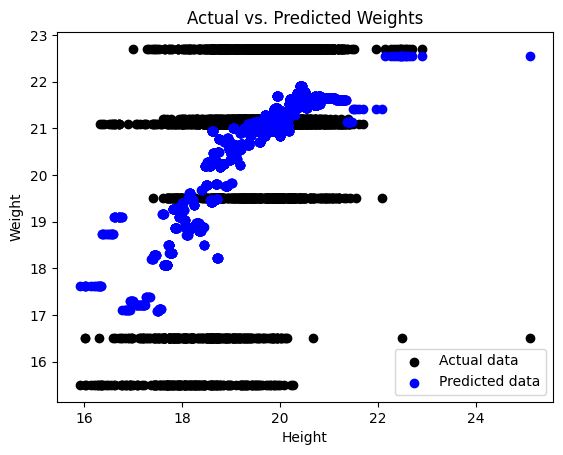

In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
# Load the data
df = pd.read_csv('data.csv')

# Convert the 'height' and 'weight' columns to numeric values (floats)
df['Height'] = pd.to_numeric(df['mean_height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['weight'], errors='coerce')

# Drop rows with missing values (NaNs)
df.dropna(subset=['Height', 'Weight'], inplace=True)

# Prepare the feature matrix (X) and the target vector (y)
X = df[['Height']].values
y = df['Weight'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=42)
xg_reg.fit(X_train, y_train)

# Predict the weights for the test set
y_pred = xg_reg.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

# Scatter plot of actual vs. predicted weights
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.scatter(X_test, y_pred, color='blue', label='Predicted data')
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
# Titles and labels
plt.title('Actual vs. Predicted Weights')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
